In [20]:
import math
import time
from cmath import inf
from typing import List
from _operator import attrgetter

from PIL import Image, ImageColor
import IPython.display

from Position import Position
from Piece import Piece
from Board import Board
from Game import Game
from Engine import Engine
from random import random
from random import randrange
from random import randint

In [21]:
class RozkosznaBot:
    def make_move(self, board):
        a = self.minmax(board,0)
        #print(a)
        return a

    def capture_possible(self, board):
        capture_moves = []
        for white in board.whites:
            if not white.king:
                for i in [-1, 1]:
                    if board.isBlack(white.position().add(1, i)):
                        if board.isEmpty(white.position().add(2, 2*i)):
                            capture_moves.append([white.position(),white.position().add(2, 2*i)])
            else:
                for xi in [-1, 1]:
                    for yi in [-1, 1]:
                        where = white.position().add(yi, xi)
                        while (board.isEmpty(where)):
                            where = where.add(yi, xi)
                        if board.isBlack(where) and board.isEmpty(where.add(yi, xi)):
                            capture_moves.append([white.position(),where.add(yi, xi)])
        return capture_moves
    
    def normal_move_possible(self, board):
            normal_moves = []
            for white in board.whites:
                if not white.king:
                    for i in [-1, 1]:
                        if board.isEmpty(white.position().add(1, i)):
                            normal_moves.append([white.position(),white.position().add(1, i)])
                else:
                    for xi in [-1, 1]:
                        for yi in [-1, 1]:
                            where = white.position().add(yi, xi)
                            while (board.isEmpty(where)):
                                normal_moves.append([white.position(),where])
                                where = where.add(yi, xi)
            return normal_moves

    def capture(self, board, piece):
        white=board.world[piece.y][piece.x]
        #print(piece.x, piece.y)
        #print(white)
        #board.show()
        if not white.king:
            for i in [-1, 1]:
                if board.isBlack(white.position().add(1, i)):
                    if board.isEmpty(white.position().add(2, 2*i)):
                        return white.position().add(2, 2*i)
        else:
            for xi in [-1, 1]:
                for yi in [-1, 1]:
                    where = white.position().add(yi, xi)
                    while (board.isEmpty(where)):
                        where = where.add(yi, xi)
                    if board.isBlack(where) and board.isEmpty(where.add(yi, xi)):
                        return where.add(yi, xi)
        return False



    def minmax(self, board, depth):
        val=-10000
        if depth%2==1:
            val=10000
        if depth>3:
            s=0
            for i in board.whites:
                s=s+i.y
            for i in board.blacks:
                if i.king:
                    s-=100
            return s
        moves=self.capture_possible(board)
        if len(moves)!=0:
            capturemove = []
            aux=moves[0][0]
            capturemove.append(aux)
            while self.capture(board,aux)!=False:
                aux2=aux
                aux=self.capture(board,aux)
                capturemove.append(aux)
                board=board.make_move([aux2,aux])
                board=board.revert()
            if depth==0:
                #print("zbijam")
                #print(len(capturemove))
                return capturemove
            if depth%2==0:
                return 10000
            return -10000;
        moves=self.normal_move_possible(board)
        whereto=moves[0]
        for i in moves:
            valaftermove=self.minmax(board.make_move(i), depth+1)
            if depth%2==0 and valaftermove>val:
                val=valaftermove
                whereto=i
            if depth%2==1 and valaftermove<val:
                val=valaftermove
                whereto=i
        if depth==0:
            return whereto
        return val

In [22]:
class UnnamedBot:
    maxdepth = 3
    def make_move(self, board):
        bestmove = self.makeMove(board = board, depth = 0, player = True, prevmove = 0) 
        rand = randrange(bestmove.__len__())
        return bestmove[0]
    
    def heuristic_evaluation(self,board):
        boardVal = 0

        if self.find_moves(board).__len__()==0:
            boardVal = -500

        if self.find_moves(board.revert()).__len__()==0:
             boardVal = 500

        for piece in board.whites:
            if piece.king:
                boardVal += 4
            else:
                boardVal += 1

        for piece in board.blacks:
            if piece.king:
                boardVal -= 4
            else:
                boardVal -= 1

        return boardVal

    def takeSecond(self,elem):
        return elem[1]

    def makeMove(self,board, depth, player, prevmove):       #player true for 'us' playing, player false for enemy playing
        possible_moves = self.find_moves(board)
        evaluations = []

        if possible_moves.__len__()==0:
            return [prevmove, self.heuristic_evaluation(board)]


        if depth==self.maxdepth:
            return [prevmove, self.heuristic_evaluation(board)]

        for move in possible_moves:
            newboard = board.make_move(move) 
            nextmove = self.makeMove(newboard, depth+1, not player, move)
            evaluations.append([move, nextmove[1]])

        if player:
            returns = []
            evaluations.sort(key = self.takeSecond, reverse = True)
            bestev = evaluations[0][1]
            for i in evaluations:
                if i[1] == bestev:
                    returns.append(i)
                else:
                    break

            rand = randrange(returns.__len__())
            return returns[rand]
        else:
            returns = []
            evaluations.sort(key = self.takeSecond, reverse = True)
            bestev = evaluations[0][1]
            for i in evaluations:
                if i[1] == bestev:
                    i[1]= -i[1]
                    returns.append(i)
                else:
                    break

            rand = randrange(returns.__len__())
            return returns[rand]

    def find_moves(self,board):
        possible_moves = []

        if board.capture_possible():
            for white in board.whites:
                if not white.king:
                    for i in [-1,1]:
                        if board.isBlack(white.position().add(1,i)):
                            if board.isEmpty(white.position().add(2,2*i)):
                                possible_moves.append([white.position(), white.position().add(2,2*i)])

                else:
                    for xi in [-1, 1]:
                        for yi in [-1, 1]:
                            where = white.position().add(yi, xi)
                        # Go in that direction, until an occuppied field is found or we reach the end of the board
                            while (board.isEmpty(where)):
                                where = where.add(yi, xi)
                            if board.isBlack(where) and board.isEmpty(where.add(yi, xi)):
                                where = where.add(yi, xi)
                                while (board.isEmpty(where)):
                                    possible_moves.append([white.position(), where])
                                    where = where.add(yi, xi)

                                #todo: add after-skip moves

            #todo: add more skips

        else:
            for white in board.whites:
                if not white.king:
                    for i in [-1, 1]:         
                        # If a piece is a man, check only if a forward-left or forward-right field is empty
                        if board.isEmpty(white.position().add(1, i)):
                            possible_moves.append([white.position(), white.position().add(1,i)])

                else:
                    for xi in [-1, 1]:
                        for yi in [-1, 1]:
                            where = white.position().add(yi, xi)
                            # Go in that direction, until an occuppied field is found or we reach the end of the board
                            while (board.isEmpty(where)):
                                possible_moves.append([white.position(), where])
                                where = where.add(yi, xi)

        return possible_moves

In [23]:
class BestBot:
    def make_move(self, board: Board) -> List[type(Position)]:
        start_time = time.time()
        best_move = []

        for depth in range(1, 100):
            best_move = self.get_best_move(board, depth)

            if time.time() >= start_time + 1:
                break

        return best_move

    def get_best_move(self, board: Board, depth):
        best_score = -inf
        best_move = []

        for move in self.get_possible_moves(board):
            new_board = board.make_move(move)
            new_score = -self.evaluate_board(new_board, depth - 1, -inf, inf, False)

            if new_score > best_score or best_score == -inf:
                best_move = move
                best_score = new_score

        return best_move

    def evaluate_board(self, board: Board, rec_left, best, worst, my_turn):
        if rec_left <= 0:
            return self.get_board_score(board)

        moves = self.get_possible_moves(board)

        new_boards = []
        for move in moves:
            #print(board.__str__())

            #for p in move:
            #    print(p.__str__(), end=" ")
            #print()
            new_board = board.make_move(move)
            #print(new_board.revert().__str__())
            new_boards.append(new_board)

        new_boards = sorted(new_boards, key=lambda b: -self.get_board_score(b))

        best_score = inf if not my_turn else -inf
        for new_board in new_boards:
            new_score = -self.evaluate_board(new_board, rec_left - 1, best, worst, not my_turn)

            if my_turn:
                best = max(best, new_score)
                if new_score >= worst:
                    return new_score

                best_score = max(best_score, new_score)
            else:
                worst = min(worst, new_score)
                if new_score > best:
                    return new_score

                best_score = min(best_score, new_score)

        return best_score

    def get_board_score(self, board: Board):
        if board.white_lost():
            return -inf

        score = 0.0
        score += len(board.whites) * 2
        score -= len(board.blacks) * 2

        for p in board.blacks:
            if p.king:
                score -= 5

        for p in board.whites:
            if p.king:
                score += 6
            else:
                for xd in [-1, 1]:
                    cap_pos = p.position().add(-1, xd)
                    if not board.on_board(cap_pos) or not board.isEmpty(cap_pos):
                        score += 0.75
        return score

    def get_possible_moves(self, board: Board):
        moves = []

        for piece in board.whites:
            man_func = self.get_moves_man if not board.capture_possible() else self.get_captures_man
            king_func = self.get_moves_king if not board.capture_possible() else self.get_captures_king
            move_func = king_func if piece.king else man_func

            moves.extend(move_func(piece.position(), board))

        return moves

    def get_moves_king(self, pos: Position, board: Board):
        for xd in [-1, 1]:
            for yd in [-1, 1]:
                for i in range(1, 10):
                    new_pos = pos.add(yd * i, xd * i)
                    if board.on_board(new_pos) and board.isEmpty(new_pos):
                        yield [pos, new_pos]
                    else:
                        break

    def get_moves_man(self, pos: Position, board: Board):
        for xd in [-1, 1]:
            new_pos = pos.add(1, xd)
            if board.on_board(new_pos) and board.isEmpty(new_pos):
                yield [pos, new_pos]

    def get_captures_king(self, pos: Position, board: Board, banned_dx=0, banned_dy=0, first=True):
        for xd in [-1, 1]:
            for yd in [-1, 1]:
                if (xd == banned_dx and yd == banned_dy) or (-xd == banned_dx and -yd == banned_dy):
                    continue

                for i in range(1, 10):
                    new_pos = pos.add(yd * i, xd * i)

                    if not board.on_board(new_pos):
                        break

                    if board.isBlack(new_pos):
                        after_kill_pos = new_pos.add(yd, xd)
                        if board.on_board(after_kill_pos) and board.isEmpty(after_kill_pos):
                            yield [pos, after_kill_pos]

                            for k in range(1, 10):
                                slide_pos = after_kill_pos.add(yd * k, xd * k)
                                if not board.on_board(slide_pos) or not board.isEmpty(slide_pos):
                                    break

                                yield [pos, slide_pos]

                            new_board = board.make_single_move(pos, after_kill_pos, True, first)
                            tails = self.get_captures_king(after_kill_pos, new_board, xd, yd, False)
                            for tail in tails:
                                move = [pos]
                                move.extend(tail)
                                yield move

                    if not board.isEmpty(new_pos):
                        break

    def get_captures_man(self, pos: Position, board: Board, first=True):
        for yd in [-1, 1]:
            if yd == -1 and first:
                continue

            for xd in [-1, 1]:
                kill_pos = pos.add(yd, xd)

                if not board.on_board(kill_pos) or not board.isBlack(kill_pos):
                    continue

                after_kill_pos = kill_pos.add(yd, xd)

                if not board.on_board(after_kill_pos) or not board.isEmpty(after_kill_pos):
                    continue

                yield [pos, after_kill_pos]
                new_board = board.make_single_move(pos, after_kill_pos, True, first)
                tails = self.get_captures_man(after_kill_pos, new_board, False)

                for tail in tails:
                    move = [pos]
                    move.extend(tail)

                    yield move

In [24]:
class Destroyer:
    def __init__(self, max_depth = 5):
        self.DIRECTION_ARR = [(1,1),(1,-1),(-1,1),(-1,-1)]
        self.max_depth = max_depth

    def get_non_capture_moves(self, board):
        moves = []
        for white in board.whites:
            pos = white.position()
            if white.king:
                for i, j in self.DIRECTION_ARR:
                    mul = 1
                    while (board.isEmpty(pos.add(i*mul,j*mul))):
                        moves.append([pos, pos.add(i*mul, j*mul)])
                        mul += 1

            else:
                for i in [1, -1]:
                    if board.isEmpty(pos.add(1,i)):
                        moves.append([pos, pos.add(1,i)])
        return moves

    def get_capture_sequence_man(self, board, piece, sequence_so_far):
        captured = set()
        sequences = []
        for i in range(len(sequence_so_far) - 1):
            p = sequence_so_far[i].middle(sequence_so_far[i + 1])
            y = p.y; x = p.x
            captured.add( (y, x) )
        p = sequence_so_far[-1]
        y = p.y; x = p.x;
        for i, j in self.DIRECTION_ARR:
            if (y + i, x + j) in captured: continue
            if board.isBlack(p.add(i, j)) and board.isEmpty(p.add(i*2,j*2)):
                new_sequence_so_far = [Position(i.y, i.x) for i in sequence_so_far]
                new_sequence_so_far.append(p.add(i*2,j*2))
                sequences += self.get_capture_sequence_man(board, piece, new_sequence_so_far)
        if len(sequences) == 0:
            return [sequence_so_far]
        return sequences

    def get_capture_moves_man(self, board, white):
        moves = []
        pos = white.position()
        for i in [1, -1]:
            if board.isBlack(pos.add(1, i)) and board.isEmpty(pos.add(2, 2*i)):
                moves += self.get_capture_sequence_man(board, white, [pos, pos.add(2, 2*i)])
        return moves

    def get_capture_moves_king(self, board, white):
        moves = []
        p = white.position()
        y = p.y; x = p.x;

        for i, j in self.DIRECTION_ARR:
            mul = 1
            while board.isEmpty(p.add(i * mul, j * mul)):
                mul += 1
            if board.isBlack(p.add(i * mul, j * mul)):
                mul += 1
                while board.isEmpty(p.add(i * mul, j * mul)):
                    moves.append([p, p.add(i * mul, j * mul)])
                    mul += 1
        return moves

    def get_capture_moves(self, board):
        moves = []
        for white in board.whites:
            if white.king:
                moves += self.get_capture_moves_king(board, white)
            else:
                moves += self.get_capture_moves_man(board, white)
        return moves

    def get_moves(self, board):
        if board.capture_possible():
            return self.get_capture_moves(board);
        else:
            return self.get_non_capture_moves(board);

    def eval(self, board):
        # number of pieces
        a = len(board.whites) / (len(board.blacks) + 0.01)
        aw = 10

        # number of kings
        b = len([white for white in board.whites if white.king]) / (len([black for black in board.whites if black.king]) + 0.01)
        bw = 100

        c = random()
        cw = 0.001

        d = 0
        for white in board.whites:
            for i, j in [(-1, -1), (-1, 1)]:
                if board.isEmpty(white.position().add(i, j)):
                    d += 1
        dw = -1

        e = 0
        for white in board.whites:
            for i, j in [(-1, -1), (-1, 1)]:
                if board.isEmpty(white.position().add(i, j)) and board.isBlack(white.position().add(-i,-j)):
                    e += 1
        ew = -1000

        f = 0
        for i in range(0, 10, 2):
            if board.isEmpty(Position(0,i)):
                f += 1
        fw = -100000

        score = a * aw + b * bw + c * cw + d * dw + e * ew + f * fw
        return score

    def min_max(self, board, depth, alpha, beta):
        # alpha is the best score for maximizing player
        # beta is best score for minimizing
        # maximizing player

        if depth == self.max_depth:
            return self.eval(board) - self.eval(board.revert())

        moves = self.get_moves(board)
        best_val = -float("inf")
        for move in moves:
            val = -self.min_max(board.make_move(move), depth + 1, -beta, -alpha)
            best_val = max(val, best_val)
            if val >= beta:
                return val
            alpha = max(val, alpha)
        return best_val

    def capturable(self, board, move):
        board = board.make_move(move).revert()
        p = move[-1]
        for r in [-1, 1]:
            if board.isBlack(p.add(1, r)) and board.isEmpty(p.add(-1, -r)):
                return True
        y, x = p.y, p.x
        for i, j in self.DIRECTION_ARR:
            m = 1
            while board.isEmpty(p.add(i*m, j*m)):
                m += 1
            if board.on_board(p.add(i*m,j*m)):
                piece = board.world[p.y + i*m][p.x + j*m]
                if piece.king and not piece.white:
                    if board.isEmpty(p.add(-i,-j)):
                        return True
        return False

    def greedy(self, board, move):
        if self.capturable(board, move):
            return -1e14
        return 0.1 * (self.eval(board.make_move(move).revert()) - self.eval(board.make_move(move)))

    def can_king(self, board):
        for white in board.whites:
            if white.king:
                continue
            p = white.position()
            y, x = p.y, p.x
            if y == 8:
                for r in [-1, 1]:
                    if board.isEmpty(p.add(1, r)):
                        return [p, p.add(1, r)]

        for white in board.whites:
            if white.king:
                continue
            p = white.position()
            y, x = p.y, p.x
            if y == 7:
                for r in [-1, 1]:
                    if board.isEmpty(p.add(1, r)):
                        for r1 in [-1, 1]:
                            if not board.isEmpty(p.add(1, r).add(1, r1)):
                                continue
                        return [p, p.add(1, r)]

    def get_vector(self, board):
        arr = [0]*50
        i = -1
        for y in range(10):
            for x in range(y&1, 10, 2):
                piece = board.world[y][x]
                i += 1
                if piece == None:
                    continue
                arr[i] = 1 if piece.white else -1
        return arr

    def make_move(self, board):
        if not board.capture_possible():
            can_king = self.can_king(board)
            if can_king is not None:
                return can_king

        moves = self.get_moves(board)
        best_val = -float("inf")
        best_move = moves[0]
        for move in moves:
            val = -self.min_max(board.make_move(move), 1, float("inf"), -float("inf")) + self.greedy(board, move)

            if val > best_val:
                best_val = val
                best_move = move
        return best_move

In [25]:
class AlfaBetaBot:
    def __init__(self):
        self.max_depth = 5
    def heuristic_state_value(self, board):
        score = 0
        num_pieces = 0
        for white in board.whites:
            num_pieces += 1
            score += 5
            if white.king:
                score += 20
            else:
                score += white.y/25
        for black in board.blacks:
            num_pieces += 1
            score -= 5
            if black.king:
                score -= 20
            else:
                score -= black.y/25
        return score / num_pieces
    def possible_captures(self, board, king, position, captures_moves_list):
        ans = []
        if not king:
            possible_y = [1]
            if len(captures_moves_list) > 1:
                possible_y.append(-1)
            for j in possible_y:
                for i in [-1, 1]:
                    if board.isBlack(position.add(j, i)):
                        if board.isEmpty(position.add(j * 2, 2 * i)):
                            new_position = position.add(j * 2, 2 * i)
                            new_board = board.make_single_move(position, new_position, True, False)
                            captures_moves_list.append(new_position)
                            ans += [captures_moves_list.copy()]
                            ans += self.possible_captures(new_board, king, new_position, captures_moves_list)
                            captures_moves_list.pop()

        else:
            for xi in [-1, 1]:
                for yi in [-1, 1]:
                    where = position.add(yi, xi)
                    while board.isEmpty(where):
                        where = where.add(yi, xi)
                    if board.isBlack(where) and board.isEmpty(where.add(yi, xi)):
                        where = where.add(yi, xi)
                        new_position = where
                        while board.isEmpty(where):
                            ans += [captures_moves_list + [where]]
                            where = where.add(yi, xi)
                        new_board = board.make_single_move(position, new_position, True, False)
                        captures_moves_list.append(new_position)
                        ans += self.possible_captures(new_board, king, new_position, captures_moves_list)
                        captures_moves_list.pop()
        return ans

    def possible_moves(self, board):
        moves = []
        if board.capture_possible():
            for white in board.whites:
                moves += self.possible_captures(board, white.king, white.position(), [white.position()])
        else:
            for white in board.whites:
                if not white.king:
                    for i in [-1, 1]:
                        if board.isEmpty(white.position().add(1, i)):
                            moves += [[white.position(), white.position().add(1, i)]]
                else:
                    for xi in [-1, 1]:
                        for yi in [-1, 1]:
                            where = white.position().add(yi, xi)
                            while board.isEmpty(where):
                                moves += [[white.position(), where]]
                                where = where.add(yi, xi)
        return moves

    def alfa_beta_first(self, board):
        sorted_moves = [(self.heuristic_state_value(board.make_move(move)), move) for move in self.possible_moves(board)]
        sorted_moves.sort(key=lambda x: (x[0] * (-1)))
        value = -float("inf")
        res_move = []
        for (_, move) in sorted_moves:
            child_value = self.alfa_beta(board.make_move(move), 1, value)
            if child_value > value or (child_value == value and randint(1, 10) > 9):
                res_move = move
                value = child_value
        return res_move

    def alfa_beta(self, board, depth = 0, best = -float("inf"), worse = float("inf")):
        if depth == self.max_depth:
            return self.heuristic_state_value(board)
        if depth % 2 == 0:
            value = -float("inf")
            for move in self.possible_moves(board):
                child_value = self.alfa_beta(board.make_move(move), depth + 1, best, worse)
                best = max(best, child_value)
                value = max(value, child_value)
                if best >= worse:
                    break
        else:
            value = float("inf")
            for move in self.possible_moves(board):
                child_value = self.alfa_beta(board.make_move(move), depth + 1, best, worse)
                worse = min(worse, child_value)
                value = min(value, child_value)
                if best >= worse:
                    break
        return value
    def make_move(self, state):
        return self.alfa_beta_first(state)

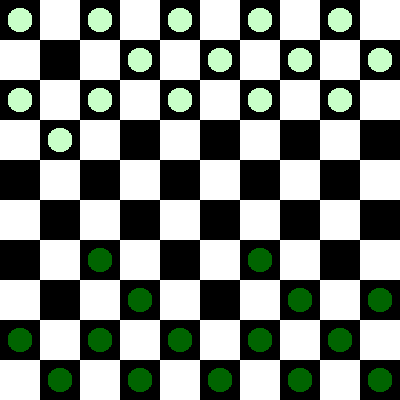

KeyboardInterrupt: 

In [27]:
Rbot = ???()
Xbot = ???()
game = Game(Rbot, Xbot)
game.play_bots(True)